In [2]:
import os
import torch
import torchvision
from skimage import io
from PIL import Image
import numpy as np

from torch.utils.data import DataLoader, Dataset

# from database_functions.databasereader import DatabaseReader

In [48]:
db_reader = DatabaseReader('crepcheque')

get_images_query = """SELECT
                            r.crep_id,
                            r.raw_brand_text,
                            i.image_id,
                            i.image_type,
                            i.image_file_path
                        FROM raw_creps r
                        LEFT JOIN
                            images i
                            ON r.crep_id = i.crep_id

                        WHERE
                            r.images IS NOT NULL
                            AND r.images_processed IS NOT NULL
                            AND i.image_downloaded = true
                        """

samples_df = db_reader.send_query(query=get_images_query, return_as_df=True)

In [49]:
samples_df.head()

,crep_id,raw_brand_text,image_id,image_type,image_file_path
0,16929,Nike,172179,Additional,/home/max/hdd-data1/images/original/16929-1721...
1,16915,Jordan,172161,Additional,/home/max/hdd-data1/images/original/16915-1721...
2,16915,Jordan,172165,Additional,/home/max/hdd-data1/images/original/16915-1721...
3,16915,Jordan,172169,Additional,/home/max/hdd-data1/images/original/16915-1721...
4,16915,Jordan,172173,Additional,/home/max/hdd-data1/images/original/16915-1721...


In [3]:
img_names = ["../dissertation_old/data/barry_data/" + filename for filename in os.listdir("../dissertation_old/data/barry_data/")[:20]]


In [4]:
import pandas as pd

In [5]:
test_df = pd.DataFrame([img_names, [i for i in range(20)]]).T
test_df.columns = ["img_name","label"]

In [6]:
test_df

,img_name,label
0,../dissertation_old/data/barry_data/4998712246...,0
1,../dissertation_old/data/barry_data/5004371187...,1
2,../dissertation_old/data/barry_data/5006149251...,2
3,../dissertation_old/data/barry_data/5000207037...,3
4,../dissertation_old/data/barry_data/5000520416...,4
5,../dissertation_old/data/barry_data/4999285299...,5
6,../dissertation_old/data/barry_data/4996728786...,6
7,../dissertation_old/data/barry_data/4614247446...,7
8,../dissertation_old/data/barry_data/3146339404...,8
9,../dissertation_old/data/barry_data/4720688927...,9


In [44]:
class ShoeDataSet(Dataset):
    
    def __init__(self, data_df,transform = None):
        
        self.data_df = data_df
        self.transform = transform
    
    def __len__(self):
        return len(self.data_df)
    
    def __getitem__(self, idx):
        
        if torch.is_tensor(idx):
            idx = idx.tolist()
    
        
        img_name = self.data_df.iloc[idx, 0] 
        image = Image.open(img_name)

        label = self.data_df.iloc[idx, 1]

        
        sample  ={"image":image, "label":label}

        
        if self.transform:
            image,label = sample["image"],sample["label"]
            image = self.transform(image)
            image = np.array(image)
            sample = {"image":image, "label":label}

        return sample
        

In [45]:
"""
1) transorms
2) totensor
3) normalize
4) scale

""";

In [72]:
trans = transforms.Compose([
    transforms.Resize((300,300)),
    transforms.ToTensor()
])

In [73]:
shoe_set = ShoeDataSet(test_df, transform=trans)

In [80]:
test_loader = DataLoader(shoe_set, shuffle=True, batch_size = 2)

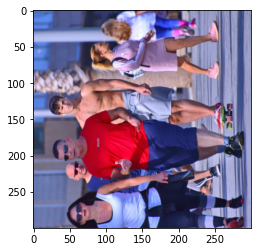

In [85]:
for data in test_loader:
    image,label = data["image"],data["label"]
    plt.imshow(np.transpose(image[1],(2,1,0)))

In [14]:
import matplotlib.pyplot as plt

In [6]:
transforms = torchvision.transforms.Compose([
    torchvision.transforms.RandomPerspective(p = 0.3), # randomly change img perspective
    torchvision.transforms.,
    
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
])

In [ ]:
for i in samples_df